### Кластеризация DBSCAN

## О датасете

Представлены следующие признаки:

* возраст: возраст основного бенефициара
* пол: женский, мужской
* ИМТ: индекс массы тела, обеспечивающий понимание тела, вес, который относительно высок или низок по отношению к росту,
объективный показатель массы тела (кг/м^2) с использованием отношения роста к весу, в идеале от 18,5 до 24,9
* детей: Количество детей, охваченных медицинским страхованием / Количество иждивенцев
* курильщик: курит ли страховщик?
* регион: район проживания получателя в США, северо-восток, юго-восток, юго-запад, северо-запад.
* сборы: Индивидуальные медицинские расходы, оплачивающиеся медицинским страхованием

In [18]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("insurance.csv")
df.drop_duplicates(keep="first",inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Ordinal encoding для визуализации

In [20]:
#ordinal encoding
enc_data = df.copy(deep=True)

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

enc.fit(enc_data["sex"])
enc_data["sex"] = enc.transform(enc_data["sex"])

enc.fit(enc_data["smoker"])
enc_data["smoker"] = enc.transform(enc_data["smoker"])

enc.fit(enc_data["region"])
enc_data["region"] = enc.transform(enc_data["region"])

enc_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### One-hot encoding для кластеризации

In [21]:
#one hot encoding
data = pd.get_dummies(df,drop_first=True)
var = data.columns

data.rename(columns = { 'sex_male':'sex', 'smoker_yes':'smoker',
                       'region_northwest':'NW', 'region_southeast':'SE',
                       'region_southwest':'SW'}, inplace = True)

data

,age,bmi,children,charges,sex,smoker,NW,SE,SW
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


## DBSCAN

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
ds = DBSCAN(eps=400, min_samples=11).fit(data)
set(ds.labels_)

{-1, 0, 1, 2, 3, 4}

In [24]:
def counter(list_):
    d={}
    for i in list_:
        if i in d:
            d[i]+=1
        else:
            d[i]=1

    nd={}
    for i in sorted(d):
        nd[i]=d[i]
    return nd

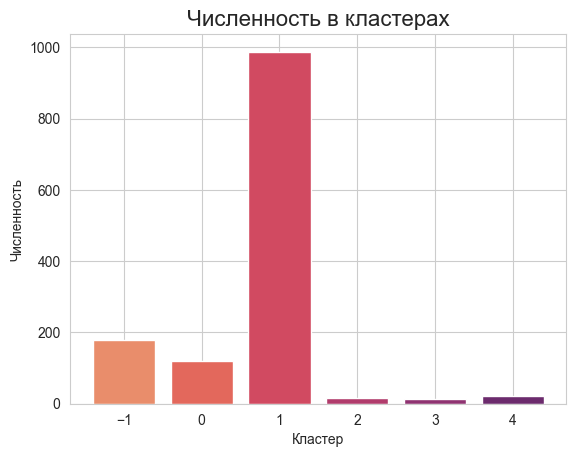

In [25]:
cluster_frequency = counter(ds.labels_)
xs = list(cluster_frequency.keys())
ys = list(cluster_frequency.values())

fig = plt.bar(xs,ys,color=sns.color_palette("flare",len(xs)))
plt.xlabel("Кластер")
plt.ylabel("Численность")
plt.title("Численность в кластерах",fontsize=16)

plt.show()

In [26]:
def ds_1d_viz(v):

    if str(v).isalpha() and v in list(data.columns):
        v = list(data.columns).index(v)

    elif str(v).isalpha() and v not in list(data.columns):
        return "No column named '{}' exists!".format(v)

    plt.figure(figsize=(12, 8))

    figure = plt.scatter(data.values[:, v], ds.labels_,
                         c=ds.labels_, cmap="Set2_r", s=25)
    plt.title("DBSCAN \n'{}' распределение ".format(data.columns[v].upper()), fontsize=16)
    plt.tick_params(left=False,labelleft=False)
    plt.legend(*figure.legend_elements(num=len(set(ds.labels_))), bbox_to_anchor =(1.2, 1))
    plt.show()

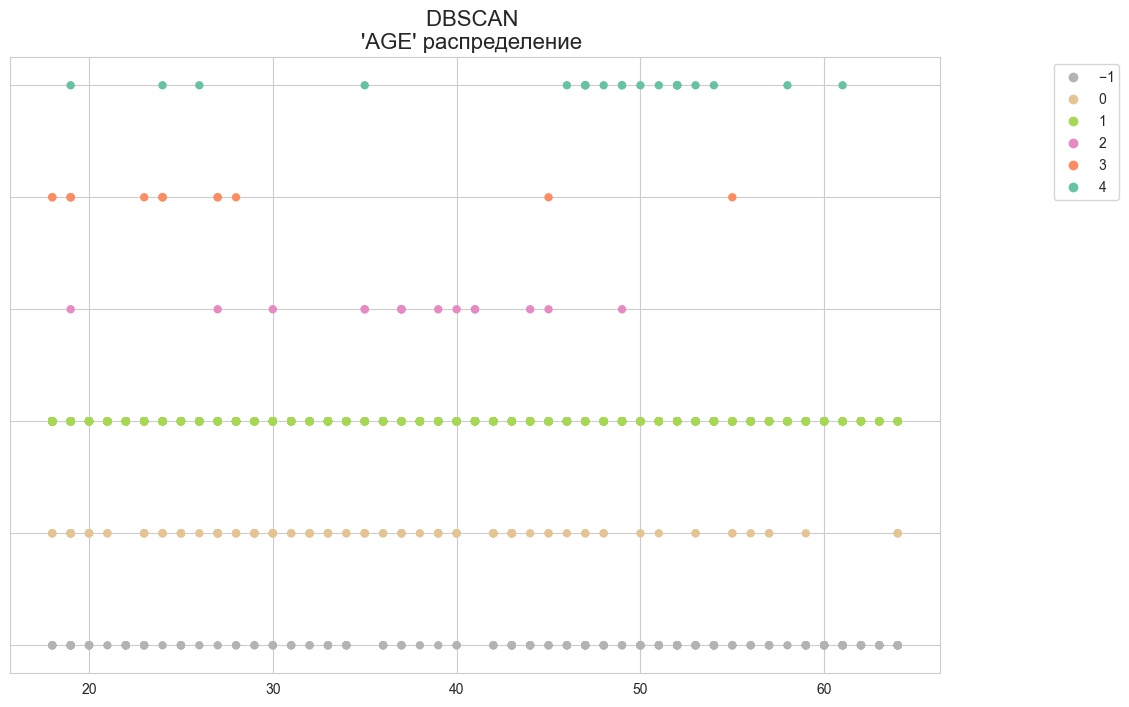

In [27]:
ds_1d_viz("age")

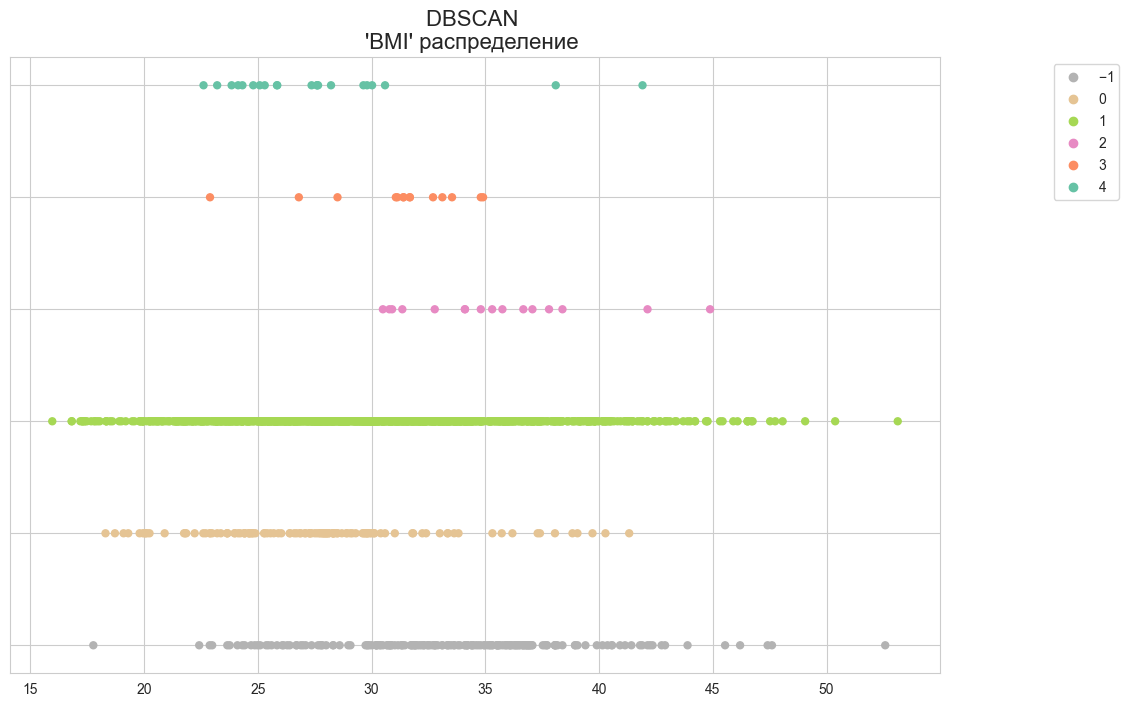

In [28]:
ds_1d_viz("bmi")

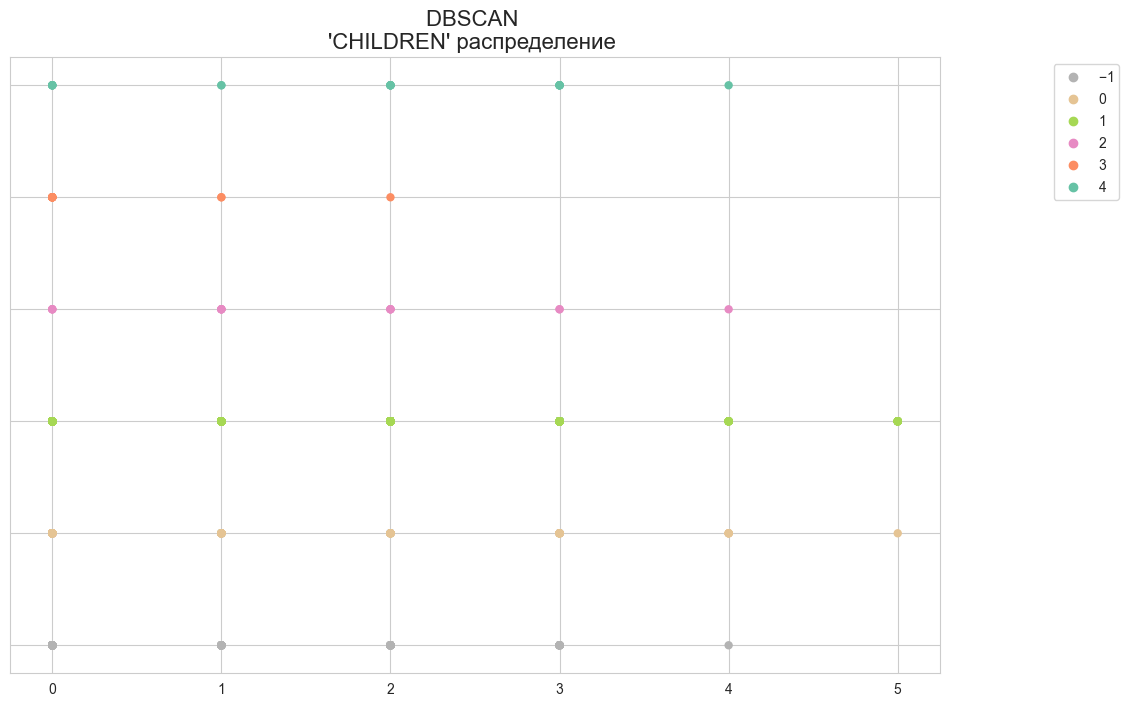

In [29]:
ds_1d_viz("children")

In [30]:
def ds_2d_viz(_):
    for i in range(2):
        if str(_[i]).isalpha() and _[i] in list(data.columns):
            _[i] = list(data.columns).index(_[i])

        elif str(_[i]).isalpha() and _[i] not in list(data.columns):
            return "No column named '{}' exists!".format(_[i])

    plt.figure(figsize=(12, 8))

    figure = plt.scatter(data.values[:, _[0]], data.values[:, _[1]],
                         label=ds.labels_,
                         c=ds.labels_, cmap="Set2_r", s=25)
    plt.title("DBSCAN",fontsize=16)
    plt.xlabel(data.columns[_[0]].upper())
    plt.ylabel(data.columns[_[1]].upper())
    plt.legend(*figure.legend_elements(num=len(set(ds.labels_))), bbox_to_anchor =(1.2, 1))
    plt.show()

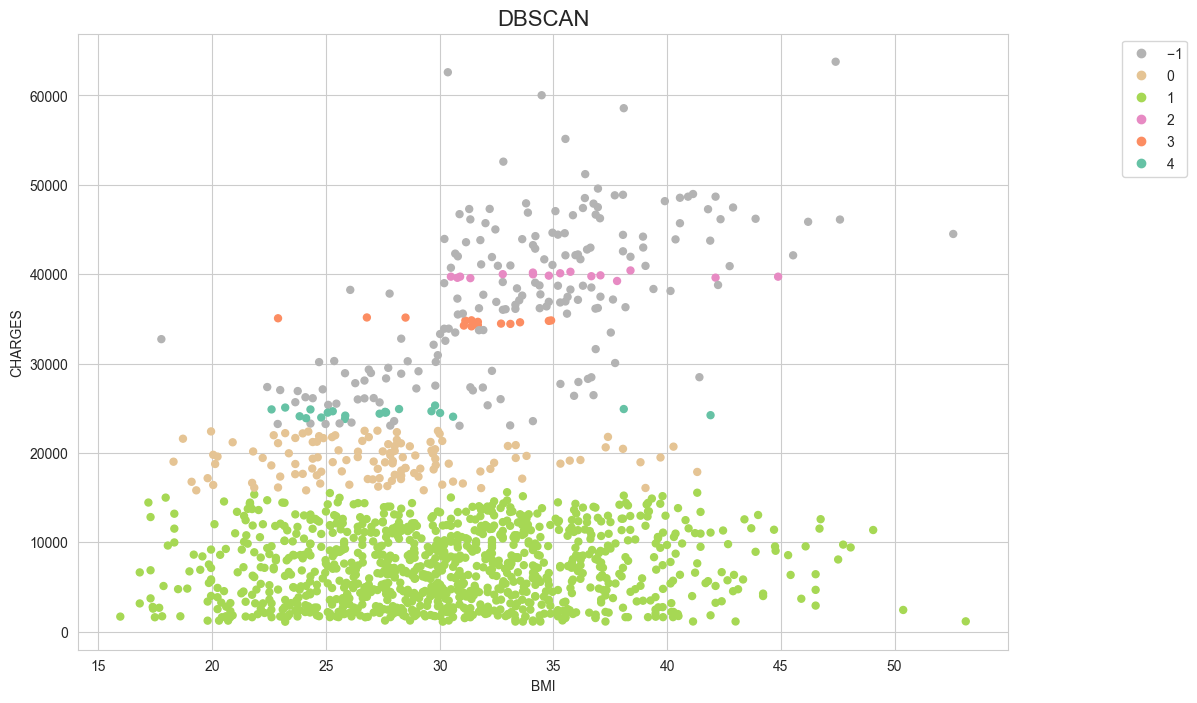

In [31]:
ds_2d_viz(["bmi","charges"])

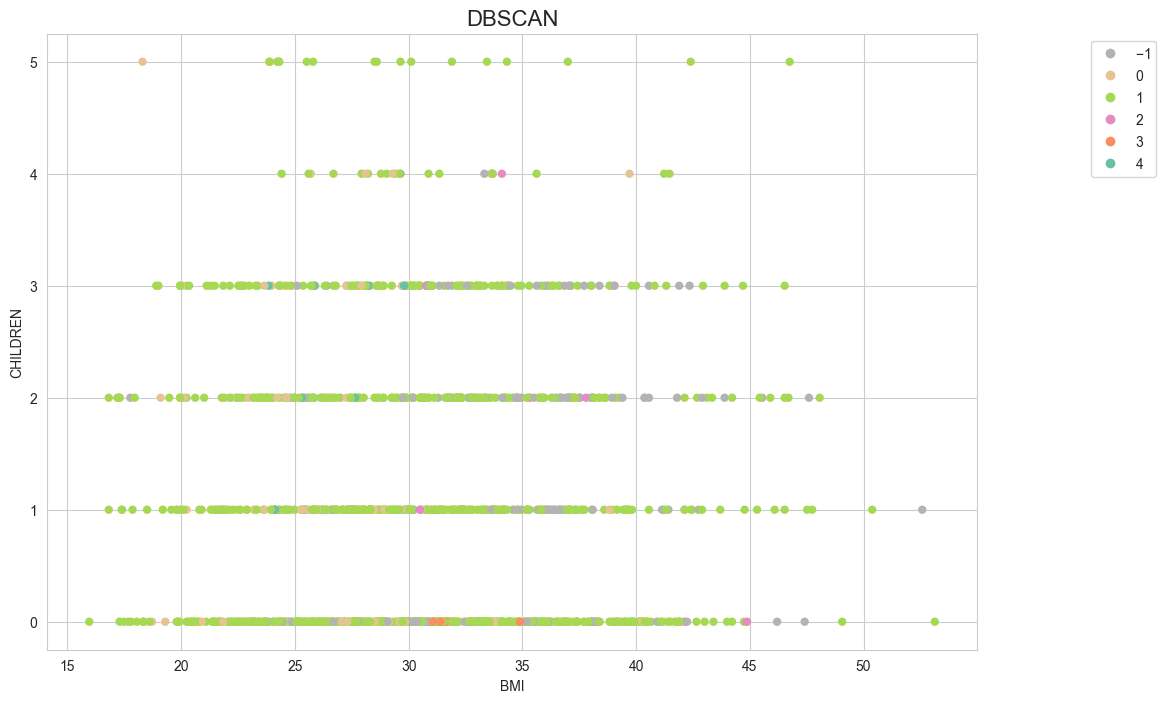

In [32]:
ds_2d_viz(["bmi","children"])

In [33]:
def ds_3d_viz(list_):
    for i in range(3):

        if str(list_[i]).isalpha() and list_[i] in list(data.columns):
            list_[i] = list(data.columns).index(list_[i])

        elif str(list_[i]).isalpha() and list_[i] not in list(data.columns):
            return "No column named '{}' exists!".format(list_[i])
    figure = plt.figure()
    ax = figure.gca(projection='3d')

    x_axis, y_axis, z_axis = data.values[:, list_[0]], data.values[:, list_[1]], data.values[:, list_[2]]

    figure = ax.scatter(x_axis, y_axis, z_axis, c=ds.labels_, cmap="Set1_r", s=25)

    ax.set_xlabel(list(data.columns)[list_[0]].upper())
    ax.set_ylabel(list(data.columns)[list_[1]].upper())
    ax.set_zlabel(list(data.columns)[list_[2]].upper())
    ax.set_title("DBSCAN ", fontsize=16)
    plt.legend(*figure.legend_elements(num=len(set(ds.labels_))), bbox_to_anchor =(1.2, 1))

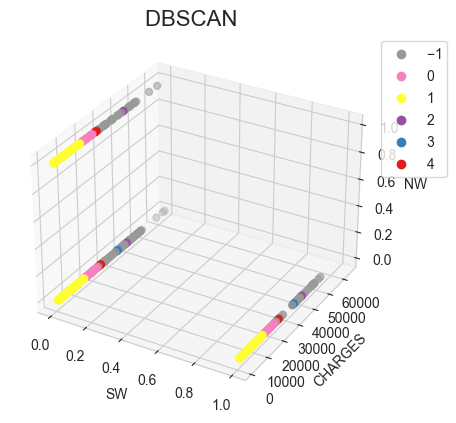

In [34]:
ds_3d_viz(random.sample(range(data.shape[1]),3))